In [4]:
import os
import re
import time
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#from fbprophet import Prophet
import jieba
from collections import Counter
from pyecharts.charts import *
import pyecharts.options as opts

plt.style.use('tableau-colorblind10')

%matplotlib inline
font = {'family' : 'SimHei',
         'weight' : 'bold',
         'size'   : '16'}
plt.rc('font', **font)               # 设置字体的更多属性,
plt.rc('axes', unicode_minus=False)  # 解决坐标轴负数的负号显示问题

%config InlineBackend.figure_format = "retina"

In [5]:
content = []
for path in os.listdir('D:/微信聊天记录'):
    p = 'D:/微信聊天记录/' + path + '/content.txt'
    try:
        f = open(p,'r',encoding="utf-8")
        content.append(f.read())
    except:
        pass
content = ','.join(content)

In [6]:
len(content)

2438088

In [77]:
content

"用户信息：鲍鱼展翅\n对象信息：Luminous\nLuminous：我通过了你的朋友验证请求，现在我们可以开始聊天了 【2021-12-01 14:56:36】\n鲍鱼展翅：你知道具体是乍回事么？是美术鉴赏有确诊？ 【2021-12-01 15:00:57】\nLuminous：我现在只知道经济学院有三个研究生确诊了，然后我们这个课按理说去的是本科生，也不知道怎么会去筛查 【2021-12-01 15:02:36】\nLuminous：估计是那三个研究生的密切接触者里有本科生，就可能密接里有上这节课的，然后我们就成了次密接 【2021-12-01 15:04:21】\n鲍鱼展翅：刚做完[捂脸] 【2021-12-01 15:05:43】\n鲍鱼展翅：这么快啊 【2021-12-01 15:05:46】\n鲍鱼展翅：亏我还请了个假 【2021-12-01 15:06:04】\nLuminous：嗯嗯 【2021-12-01 15:06:08】\nLuminous：哈哈哈哈哈哈 【2021-12-01 15:06:12】\nLuminous：待会还有课吗，现在去上课也来得及[憨笑] 【2021-12-01 15:06:30】\n鲍鱼展翅：还要去学院开假条 【2021-12-01 15:06:42】\n鲍鱼展翅：刚刚有课 【2021-12-01 15:06:57】\n鲍鱼展翅：然后没去 【2021-12-01 15:07:11】\nLuminous：哦哦 【2021-12-01 15:07:13】\nLuminous：错过了就错过了，歇一节课[旺柴] 【2021-12-01 15:07:46】\nLuminous：那些辅导员应该四点半就下课了 【2021-12-01 15:08:06】\nLuminous：早点过去开 【2021-12-01 15:08:13】\n鲍鱼展翅：关键是上午已经，找辅导员找两次了，都说在办公室，然后去了以后说刚走 【2021-12-01 15:08:27】\nLuminous：啊这 【2021-12-01 15:09:33】\nLuminous：稍等 【2021-12-01 15:09:37】\nLuminous：我问一下 【2021-12-01 15:09:40】\n鲍鱼展翅：我先找个地方放书包吧，等下跟他办公室门口就不信了 【2021-1

In [78]:
# 分别统计两人的聊天记录
chat_baoyu = re.findall(r"鲍鱼展翅：(.*?)\n", content, re.S)
chat_Luminous = re.findall(r"Luminous：(.*?)\n", content, re.S)

In [81]:
str(chat_Luminous)

"['我通过了你的朋友验证请求，现在我们可以开始聊天了 【2021-12-01 14:56:36】', '我现在只知道经济学院有三个研究生确诊了，然后我们这个课按理说去的是本科生，也不知道怎么会去筛查 【2021-12-01 15:02:36】', '估计是那三个研究生的密切接触者里有本科生，就可能密接里有上这节课的，然后我们就成了次密接 【2021-12-01 15:04:21】', '嗯嗯 【2021-12-01 15:06:08】', '哈哈哈哈哈哈 【2021-12-01 15:06:12】', '待会还有课吗，现在去上课也来得及[憨笑] 【2021-12-01 15:06:30】', '哦哦 【2021-12-01 15:07:13】', '错过了就错过了，歇一节课[旺柴] 【2021-12-01 15:07:46】', '那些辅导员应该四点半就下课了 【2021-12-01 15:08:06】', '早点过去开 【2021-12-01 15:08:13】', '啊这 【2021-12-01 15:09:33】', '稍等 【2021-12-01 15:09:37】', '我问一下 【2021-12-01 15:09:40】', '我刚刚问了党建值班的的同学 【2021-12-01 15:18:14】', '说他不在 【2021-12-01 15:18:19】', 'cwj 【2021-12-01 15:18:23】', '你已经过去蹲他了吗 【2021-12-01 15:19:11】', '[捂脸][捂脸] 【2021-12-01 15:19:24】', '我也不知道，他们经常不在办公室 【2021-12-01 15:19:49】', '经常找不到人 【2021-12-01 15:20:02】', '哈哈哈哈哈哈哈 【2021-12-01 15:21:45】', '这倒是也不是不可以 【2021-12-01 15:22:01】', '我们次密接 【2021-12-01 15:22:10】', '密接还是有点恐怖的 【2021-12-01 15:22:23】', '听说你当时还把辅导员当骗子了 【2021-12-01 15:22:57】', '哈哈哈哈哈 【2021-12-01 15:22:59】', '对 【2021-12-01 15:23:01】', 

In [16]:
# 正则提取
chat_time = re.findall(r"(\d{4}-\d{1,2}-\d{1,2} \d{1,2}:\d{1,2}:\d{1,2})",content,re.S)
chat_emoji = re.findall(r'[[](.*?)[]]',content,re.S)
content_ = re.sub('【(\d{4}-\d{1,2}-\d{1,2} \d{1,2}:\d{1,2}:\d{1,2})】','',content)
content_ = re.sub(r'[[](.*?)[]]','',content_)
content_ = re.sub('\nLuminous：','',content_)
content_ = re.sub('感觉','',content_)
chat_content = re.sub('\n鲍鱼展翅：','',content_)
chat_emoji = re.findall(r'[[](.*?)[]]',content,re.S)

In [17]:
content_spt = chat_content.split(' ')

In [18]:
len(chat_time)

64623

In [19]:
chat_content[2000:3000]

'jy 加油 加油 请问一下你胳膊有这种症状吗？之前胳膊一点反应没有，这两天反而红了 是突然觉得自己病发了吗鲍兄 突感异常 我其实也觉得有点奇怪 我的也红红的 那我就放心了 可能是正常反应吧 莫慌 我看知乎说红肿直径10mm以内 刚洗澡突然发现 这个看着在10mm内的 我这边的要比你的还大一点 可能我比较白吧 显小  5mm 网图 这样好恐怖 这可能已经是重症了吧 不行 我要再去搜搜 我寻思这玩意不应该是越来越淡么？这越来越深就离谱 有点小担心 某乎说假阳性很常见 我明天去问问校医院的人 应该没必要吧？我就是突然发现，也不知道是不是我的问题 那天那个医生按压了一下就说没事 那天我皮肤连红的都看不出来，医生看了一眼就让我过去了 还问我打的是不是左手 我也是这两天看着有点红 那就再观望一下 应该大家都差不多 主要是开始红肿 你有点肿吗 有点鼓，肿没 但也没有太鼓 我也是，那块变大了一点，按压吧，有点点鼓鼓的样子 主要是，会越来越大  啊 不会吧 那这不是相当于确诊了吗 哈哈哈哈哈  不会的不会的 我们也没有咳嗽什么的 应该没事 没事要是真的你也跑不掉 而且拍的胸片也没反馈什么 同生死共患难  够讲义气不 真有了，胸片没那么快 赵兄 请受小弟一拜 哎，怎么我成弟了 我肯定是第 弟尚未弱冠呢 那这 唐突了 鲍弟 你好年轻呀  我都快21了 唉，大家都老了 我提前一年上学的吧，黑户 不老不老，哆啦A梦永远年轻 黑户  是呐 咋提到哆啦了啊  我这头像就没换过 前段时间看来哆啦A梦的那个伴我同行吧好像 电影？ 过段时间还有哦，宇宙大冒险 是的 哇偶 延期一年上映 蛮喜欢哆啦A梦的 难得你也看哆啦 太治愈了 我怎么不看 同道中人 是我看起来不像看哆啦的样子吗 我错了  https://mlsub.net/ 看你头像就知道应该喜欢哆啦 哇偶 资深呐 嘿嘿嘿嘿 你收藏了很多周边吗 没，就是找了家店把我Q头像印到桌垫上了 QQ头像是哪张图来着 哦哦哦哦 (⊙o⊙)哇 爱了 我一直觉得这些治愈人间的小可爱是我们生活最好的礼物 年少不知，错把哆啦当上帝 哈哈哈哈哈 很少有男孩子也喜欢哆啦 真不错 继续保持 收图了 现在都是我的下饭视频 挺好的 真的吗 哈哈哈哈 这是找到同胞了 难得 确实难得，我身边就没有见过这样的男孩子 他们都是各种各样的游戏 可能是因为我接触的几乎都是♂的 围棋算益智游

In [20]:
# 停用词
stoptxt = []
for p in os.listdir('./stopwords-master'):
    if p[-3:] == 'txt':
        pa = './stopwords-master/' + p
        fp = open(pa,'r',encoding="utf-8")
        stoptxt.extend(fp.readlines())

def fix(x):
    return x[:-1]
stoptxt = [fix(x) for x in stoptxt]
stoptxt = set(stoptxt)

In [21]:
len(stoptxt)

2322

In [13]:
from textrank4zh import TextRank4Keyword, TextRank4Sentence
import jieba.analyse
from snownlp import SnowNLP
#关键词抽取
def keywords_extraction(text):
    tr4w = TextRank4Keyword(allow_speech_tags=['n', 'nr', 'nrfg', 'ns', 'nt', 'nz'])
    # allow_speech_tags   --词性列表，用于过滤某些词性的词
    tr4w.analyze(text=text, window=2, lower=True, vertex_source='all_filters', edge_source='no_stop_words',
                 pagerank_config={'alpha': 0.85, })
    # text    --  文本内容，字符串
    # window  --  窗口大小，int，用来构造单词之间的边。默认值为2
    # lower   --  是否将英文文本转换为小写，默认值为False
    # vertex_source  -- 选择使用words_no_filter, words_no_stop_words, words_all_filters中的哪一个来构造pagerank对应的图中的节点
    #                -- 默认值为`'all_filters'`，可选值为`'no_filter', 'no_stop_words', 'all_filters'
    # edge_source  -- 选择使用words_no_filter, words_no_stop_words, words_all_filters中的哪一个来构造pagerank对应的图中的节点之间的边
    #              -- 默认值为`'no_stop_words'`，可选值为`'no_filter', 'no_stop_words', 'all_filters'`。边的构造要结合`window`参数
 
    # pagerank_config  -- pagerank算法参数配置，阻尼系数为0.85
    keywords = tr4w.get_keywords(num=6, word_min_len=2)
    # num           --  返回关键词数量
    # word_min_len  --  词的最小长度，默认值为1
    return keywords
 
#关键短语抽取
def keyphrases_extraction(text):
    tr4w = TextRank4Keyword()
    tr4w.analyze(text=text, window=2, lower=True, vertex_source='all_filters', edge_source='no_stop_words',
                 pagerank_config={'alpha': 0.85, })
    keyphrases = tr4w.get_keyphrases(keywords_num=6, min_occur_num=1)
    # keywords_num    --  抽取的关键词数量
    # min_occur_num   --  关键短语在文中的最少出现次数
    return keyphrases
 
#关键句抽取
def keysentences_extraction(text):
    tr4s = TextRank4Sentence()
    tr4s.analyze(text, lower=True, source='all_filters')
    # text    -- 文本内容，字符串
    # lower   -- 是否将英文文本转换为小写，默认值为False
    # source  -- 选择使用words_no_filter, words_no_stop_words, words_all_filters中的哪一个来生成句子之间的相似度。
    # 		  -- 默认值为`'all_filters'`，可选值为`'no_filter', 'no_stop_words', 'all_filters'
    # sim_func -- 指定计算句子相似度的函数
 
    # 获取最重要的num个长度大于等于sentence_min_len的句子用来生成摘要
    keysentences = tr4s.get_key_sentences(num=3, sentence_min_len=6)
    return keysentences
 
 
def keywords_textrank(text):
    keywords = jieba.analyse.textrank(text, topK=6)
    return keywords

In [22]:
#关键词抽取
keywords=keywords_extraction(chat_content)
print(keywords)

[{'word': '有点', 'weight': 0.0067580393917715375}, {'word': '元宝', 'weight': 0.0035414248141970995}, {'word': '寝室', 'weight': 0.0034923664434277856}, {'word': '啊啊啊', 'weight': 0.0033662725086273976}, {'word': '室友', 'weight': 0.0030665198189739444}, {'word': '问题', 'weight': 0.0028094135750786503}]


In [26]:
#关键短语抽取
keyphrases=keyphrases_extraction(chat_content)
print(keyphrases)

['说看', '不说不', '说不说', '说不', '去没', '去不去', '去去', '不说', '现在看', '不去看', '说说', '现在不', '说去', '没没没', '没看', '不不', '现在没', '没没', '说现在', '没说', '说没', '现在去', '没去', '看不', '现在说', '去说', '不现在', '不说说', '看看', '去看', '不看', '不去', '现在没看']


In [28]:
#关键句抽取
keysentences=keysentences_extraction(chat_content)
print(keysentences)

[{'index': 389, 'sentence': '周二 第一针4-22 周四 那你比我早一天 不应该你们先打么 可能看的是第二针的时间吧 第二针与加强针个六个月就可以打 你早好多呢 哈哈哈哈哈 怎么回事 我去问问tt 你去垃圾信箱看看 没有 没找到 不知道呢 没事 我跟听听一起打的 她也没收到 哈哈 可能这批慢 可能吧 再等等吧 好滴 考完试先去看看潇洒哥 还是以前的那些好看 现在都太幼稚了 我还看什么神厨小福贵 中华小子 侠岚 虹猫蓝兔七侠传 哈哈哈哈哈 我看我弟妹他们小学了还在看什么低智动画 洛洛历险记 哈哈哈哈 我都没听过 好多啊，电击小子 喜狼狼 哈哈哈哈 铁臂阿童木什么的都有 真的那个时候看的好多好多 现在都不给播放了 对 还有个 大角牛那个 叫什么来着 我们这代人，最大的馈赠就是这些动画 哈哈哈，不记得了 现在不给放的原因就奇奇怪怪 至少我中考作文就是哆啦A梦 真不错 写进回忆里 中考语文131，全市最高134，前几十吧，哈哈哈哈 哈哈哈哈哈哈 太棒了我的哥 哆啦我初中，就发现这个话题不管什么话题都可以套用，友情、责任感、努力等等 哆啦创造无限可能 对呐，谁不喜欢哆啦呢 所以我初中这个话题练了几十遍，真的，后来我们老师都让其他人学我，找一个万能模板  嘿嘿，那真的很棒了，就直接稳稳的写就行 战略上的胜利，至少题材新颖，而且直击老师童年的回忆 反正写也写的是自己的感受，行云流水，不带慌的 真的 哈哈哈哈 真不错 这就可能是热爱的力量 哈哈哈哈哈 怎么突然这么正经 化热爱为分数 这就是爱的力量 哈哈哈 对 学到了 我改天也去化个试试 哈哈哈哈哈 别拿我这套教你弟，出事别怪我  哈哈哈哈哈 我弟 教不动 那都是你教的 天天教人家学坏  唉 我把谁教坏了 你吗 我是你哥~  哥哥您说得对 是妹妹错了 我听得都羞耻  哈哈哈哈哈 那我就常说，叫你一天给我截出来，看谁更羞耻 反正我现在脸皮练出来了 我不羞耻，羞耻的就只有你了 坏了 被你练出来了 这一波反客为主 那就多叫 学到没 好了啦~ 你真不去吃饭了吗 昂 晚上简简单单就行了 那晚点能邀请寿星散散步吗 还是寿星要学习了 可以啊，哈哈哈反正没事 你等会不是回寝室了吗 我等会不回呀 谁说我要回了 这个晚点是说晚上回去后呢，还是吃完饭后呢 吃完饭吧 或者看你 我都行 那就吃完饭吧 我整理完大数据技术的材料要去打

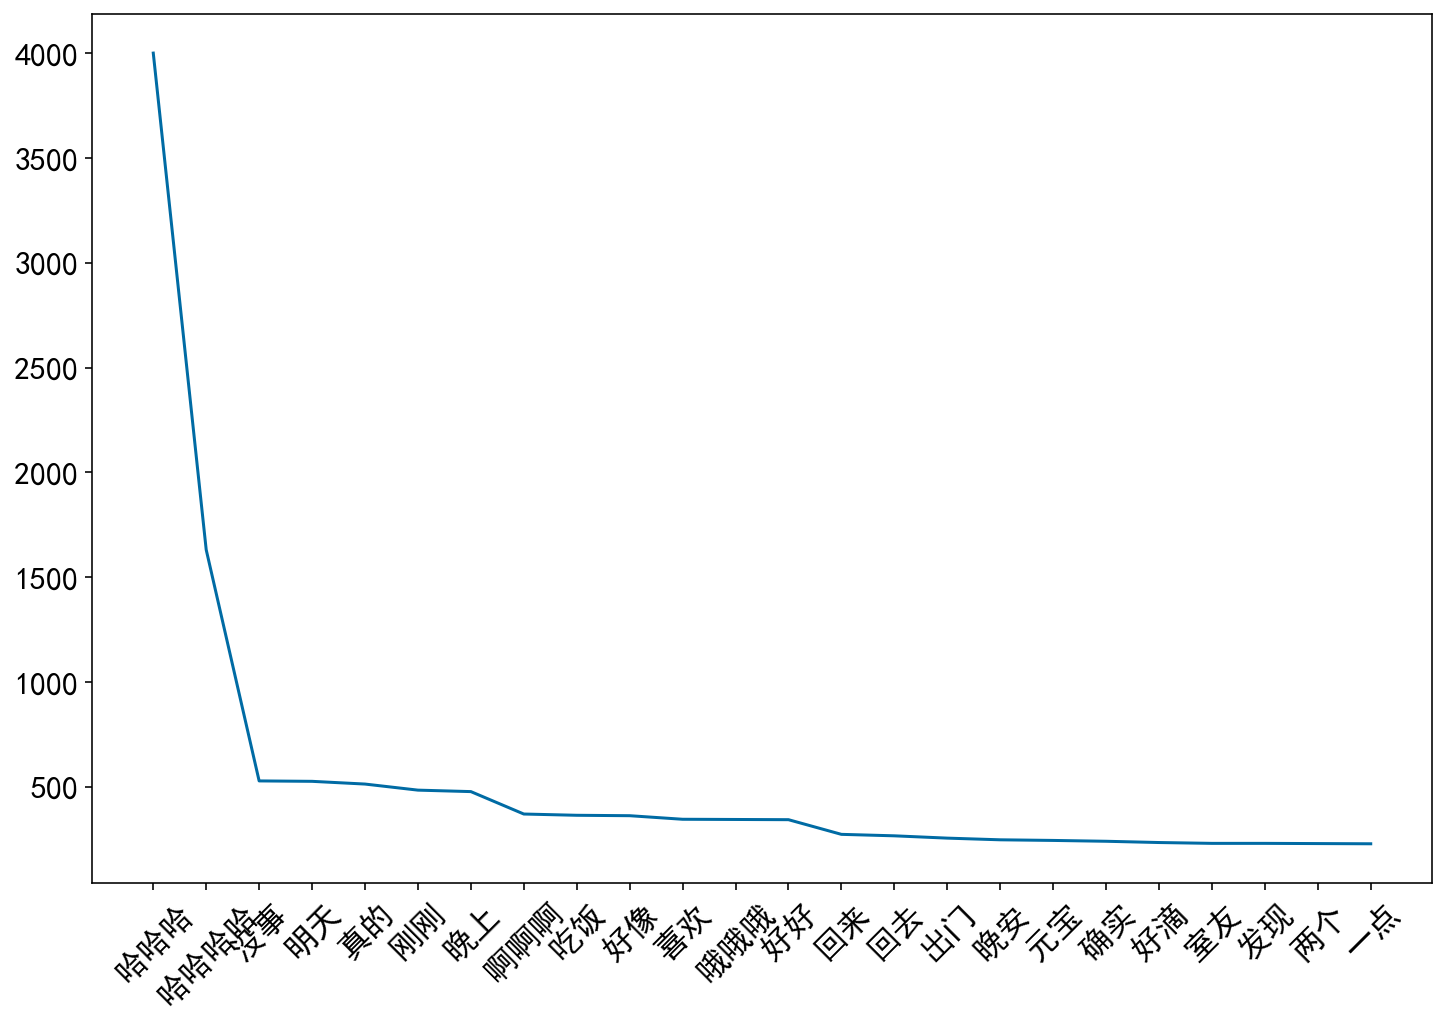

In [29]:
# 去除停用词，生成词频数据
contents_list = jieba.cut(chat_content)
ac = Counter(contents_list)

for i in stoptxt:
    del ac[i]

word = [i for i in dict(ac.most_common(50)).keys() if len(i)>1]
freq = [dict(ac.most_common(50)).get(key) for key in word]
plt.figure(figsize=(12,8))
plt.plot(word[:30],freq[:30])
plt.xticks(rotation=45)
plt.show()

In [30]:
b1 = (
    Bar(init_opts=opts.InitOpts(width="900px", height="600px"))#, theme="dark"
    .add_xaxis(word[::-1])
    .add_yaxis('词频', freq[::-1], color="#d17b81")
    .reversal_axis()
    .set_global_opts(
        title_opts=opts.TitleOpts(title='热聊词汇'),
        yaxis_opts=opts.AxisOpts(name='词汇'),
        xaxis_opts=opts.AxisOpts(name='词频'),
        )
    .set_series_opts(label_opts=opts.LabelOpts(position="right"))

)
# 设置位置
# 因为 Y 轴标签会被遮挡
# grid = (Grid(init_opts=opts.InitOpts(width="800px", height="450px"))
#         .add(b1,grid_opts=opts.GridOpts(pos_left="21%"))
#         )
# #grid.render_notebook()
b1.render("b1.html")
#b1.render_notebook()

'C:\\Users\\鲍鱼展翅\\Desktop\\language bank\\自然语言处理\\CLASS\\NLP_ChatAnalyze\\project\\b1.html'

In [61]:
w1 = (
    WordCloud(init_opts=opts.InitOpts(width="1200px", height="800px"))#, theme="dark"
    .add("", 
         ac.most_common(250), 
         #word_size_range=[20, 60], 
         textstyle_opts=opts.TextStyleOpts(font_family="cursive"))#,shape='star'
    .set_global_opts(title_opts=opts.TitleOpts(title="词云"))
)
#w1.render_notebook()
w1.render('wordcloud.html')

'C:\\Users\\鲍鱼展翅\\Desktop\\language bank\\自然语言处理\\CLASS\\NLP_ChatAnalyze\\project\\wordcloud.html'

In [31]:
# 时间数据提取
def fixtime(x):
    return datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')

chat_dtime = [fixtime(x) for x in chat_time]

In [32]:
df_dt = pd.DataFrame(chat_dtime,columns=["Time"])
df_dt['Month'] = df_dt["Time"].apply(lambda x: x.month)
df_dt['Day'] = df_dt["Time"].apply(lambda x: x.day)
df_dt['Hour'] = df_dt["Time"].apply(lambda x: x.hour)
df_dt["DateTime"] = df_dt['Time'].apply(lambda x: x.strftime('%Y-%m-%d'))


In [33]:
df_dt.head()

Time  Month  Day  Hour    DateTime
0 2021-12-01 14:56:36     12    1    14  2021-12-01
1 2021-12-01 15:00:57     12    1    15  2021-12-01
2 2021-12-01 15:02:36     12    1    15  2021-12-01
3 2021-12-01 15:04:21     12    1    15  2021-12-01
4 2021-12-01 15:05:43     12    1    15  2021-12-01

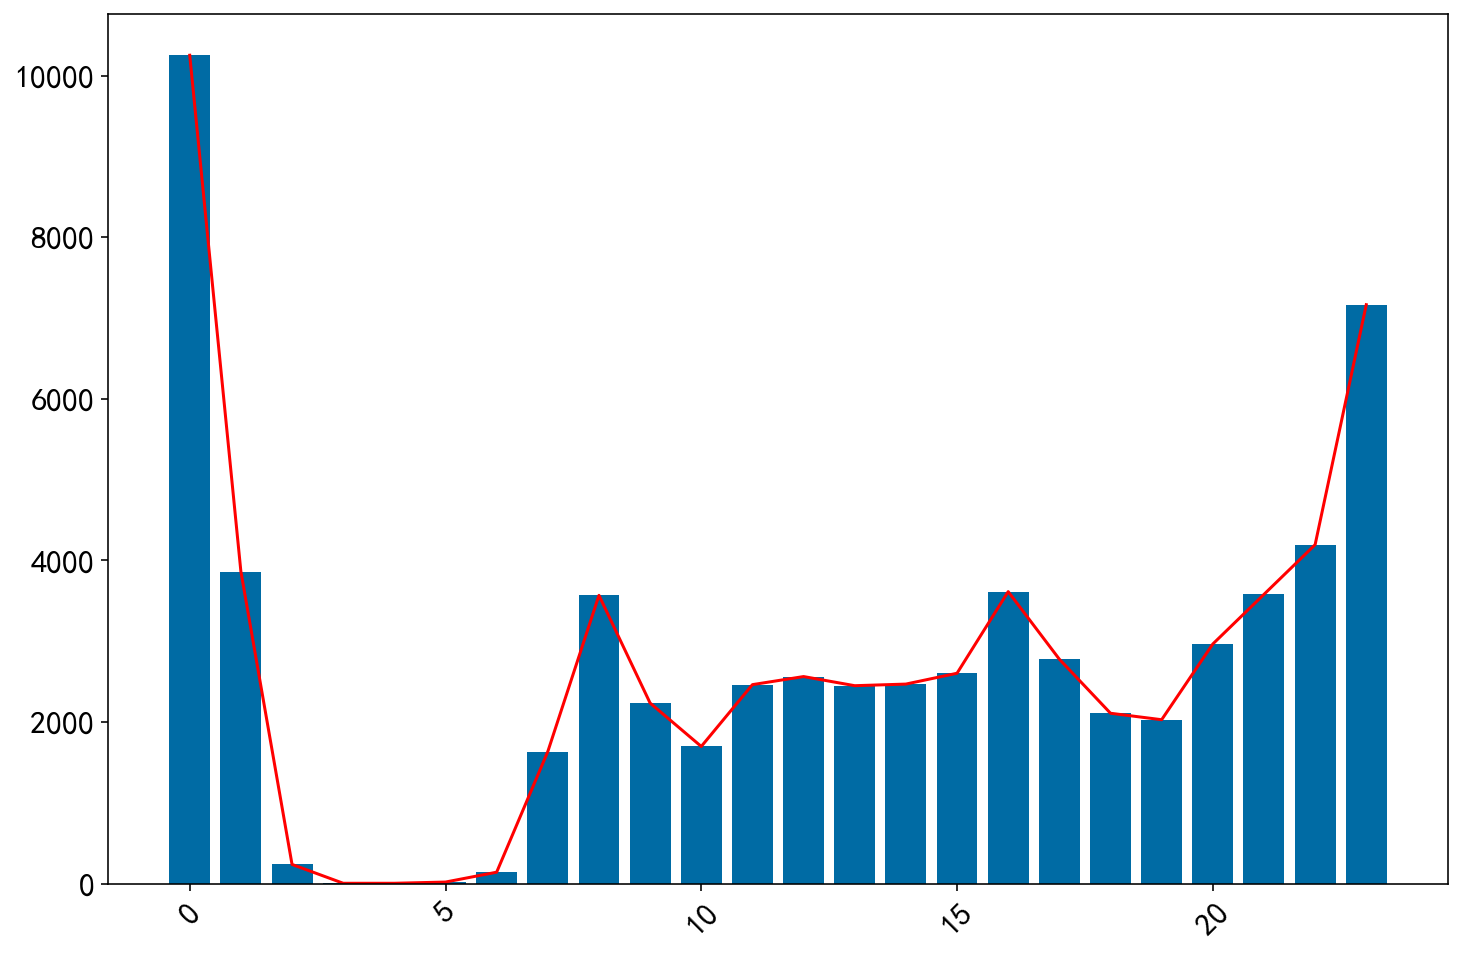

In [34]:
# 每天24h内的聊天频率分析
plt.figure(figsize=(12,8))
plt.plot(list(range(24)), df_dt.groupby(df_dt['Hour']).count()['Time'],'r',label='polyfit values')
plt.bar(list(range(24)), df_dt.groupby(df_dt['Hour']).count()['Time'])
plt.xticks(rotation=45)
plt.show()

In [58]:
b2 = (
    Bar(init_opts=opts.InitOpts(width="900px", height="600px"))#, theme="dark"
    .add_xaxis(list(range(24)))
    .add_yaxis('频率', list(df_dt.groupby(df_dt['Hour']).count()['Time']), color="olive")
    #.reversal_axis()
    .set_global_opts(
        title_opts=opts.TitleOpts(title='每日热聊时间'),
        yaxis_opts=opts.AxisOpts(name='聊天频率'),
        xaxis_opts=opts.AxisOpts(name='时间'),
        )
    .set_series_opts(label_opts=opts.LabelOpts(position="right", is_show = False))

)
b2.render('b2.html')

'C:\\Users\\鲍鱼展翅\\Desktop\\language bank\\自然语言处理\\CLASS\\NLP_ChatAnalyze\\project\\b2.html'

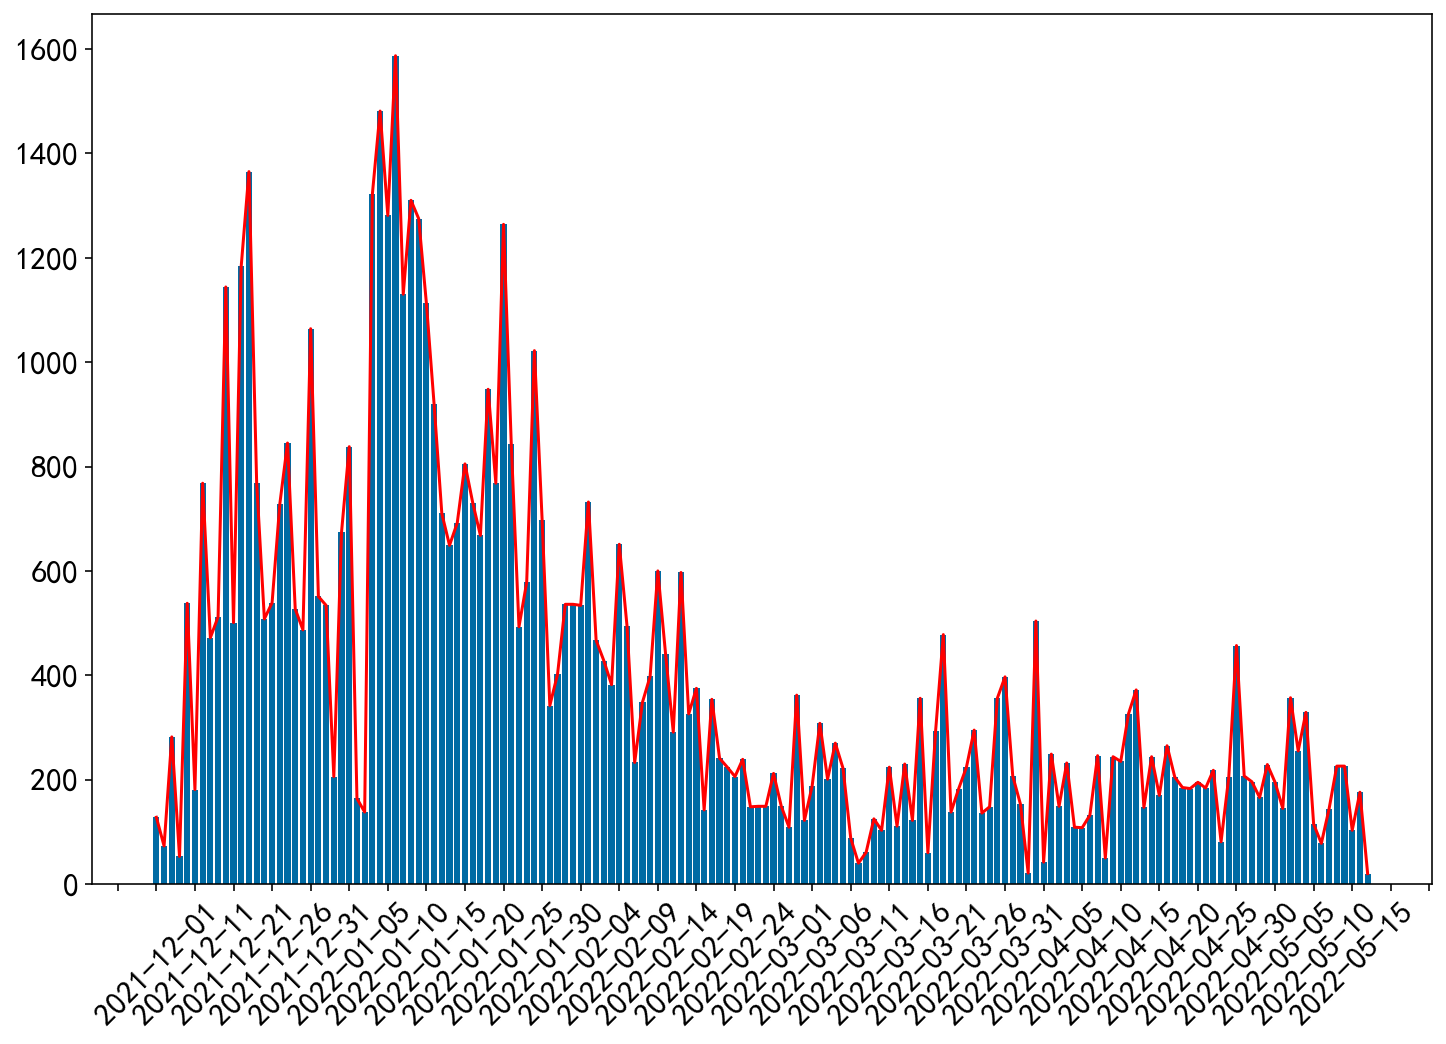

In [35]:
# 聊天频率分析
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
#plt.figure(figsize=(12,8))
ax.plot(sorted(list(set(df_dt['DateTime']))), df_dt.groupby(df_dt['DateTime']).count()['Time'],'r')
ax.bar(sorted(list(set(df_dt['DateTime']))), df_dt.groupby(df_dt['DateTime']).count()['Time'])
tick_spacing = 5
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation=45)
plt.show()

In [59]:
b3 = (
    Bar(init_opts=opts.InitOpts(width="900px", height="600px"))#, theme="dark"
    .add_xaxis(sorted(list(set(df_dt['DateTime']))))
    .add_yaxis('频率', list(df_dt.groupby(df_dt['DateTime']).count()['Time']), color="olive")
    #.reversal_axis()
    .set_global_opts(
        title_opts=opts.TitleOpts(title='热聊时间'),
        yaxis_opts=opts.AxisOpts(name='聊天频率'),
        xaxis_opts=opts.AxisOpts(name='时间'),
        )
    .set_series_opts(label_opts=opts.LabelOpts(position="right", is_show = False))

)
b3.render('b3.html')

'C:\\Users\\鲍鱼展翅\\Desktop\\language bank\\自然语言处理\\CLASS\\NLP_ChatAnalyze\\project\\b3.html'

In [87]:
# 聊天表情使用
chat_emoji_baoyu = re.findall(r'[[](.*?)[]]',str(chat_baoyu),re.S)[1:]
chat_emoji_Luminous = re.findall(r'[[](.*?)[]]',str(chat_Luminous),re.S)[1:]

ac_emj = Counter(chat_emoji)
ac_emj_by = Counter(chat_emoji_baoyu)
ac_emj_lm = Counter(chat_emoji_Luminous)

In [90]:
dict(ac_emj_by.most_common(20)).keys()

dict_keys(['憨笑', '旺柴', '捂脸', '委屈', '害羞', '撇嘴', '囧', '猪头', '大哭', '奸笑', '亲亲', '坏笑', '偷笑', '抠鼻', '白眼', '擦汗', '可怜', '色', '太阳', '疑问'])

In [76]:
b4 = (
    Bar(init_opts=opts.InitOpts(width="700px", height="500px"))#, theme="dark"
    .add_xaxis(list(dict(ac_emj.most_common(10)).keys())[::-1])
    .add_yaxis('频率', list(dict(ac_emj.most_common(10)).values())[::-1], color="fuchsia")
    .reversal_axis()
    .set_global_opts(
        title_opts=opts.TitleOpts(title='表情emoji'),
        yaxis_opts=opts.AxisOpts(name='表情种类'),
        xaxis_opts=opts.AxisOpts(name='使用量'),
        )
    .set_series_opts(label_opts=opts.LabelOpts(position="right", is_show = False))

)
b4.render('b4.html')

'C:\\Users\\鲍鱼展翅\\Desktop\\language bank\\自然语言处理\\CLASS\\NLP_ChatAnalyze\\project\\b4.html'

In [105]:
emoji_ = dict(ac_emj.most_common(15))

b5 = (
    Bar(init_opts=opts.InitOpts(width="700px", height="500px"))#, theme="dark"
    .add_xaxis(list(emoji_.keys())[::-1])
    .add_yaxis('鲍鱼展翅', [dict(ac_emj_by.most_common()).get(i) for i in list(list(emoji_.keys())[::-1])], color="green", stack="stack")
    .add_yaxis('Luminous', [dict(ac_emj_lm.most_common()).get(j) for j in list(list(emoji_.keys())[::-1])], stack='stack',color="teal")
    .reversal_axis()
    .set_global_opts(
        title_opts=opts.TitleOpts(title='表情emoji'),
        yaxis_opts=opts.AxisOpts(name='表情种类'),
        xaxis_opts=opts.AxisOpts(name='使用量'),
        )
    .set_series_opts(label_opts=opts.LabelOpts(position="right", is_show = False))

)
b5.render('b5.html')

'C:\\Users\\鲍鱼展翅\\Desktop\\language bank\\自然语言处理\\CLASS\\NLP_ChatAnalyze\\project\\b5.html'

In [37]:
from nltk.probability import FreqDist 
import math
import sys
sys.path.append('../common')
from evaluate import *
# 词语最低熵
min_entropy = 0.8 
# 词语最低互信息
min_p = 7
# 词语最长长度
max_gram = 4
# 词语最低频率
min_freq = 5

text = chat_content

def load_dictionary(dict_file):
    """
    加载词库
    :return: 一个set形式的词库
    """
    with open(dict_file,encoding="utf-8") as fr:
        word_list = [item.strip().split("\t")[0] for item in fr]
        return set(word_list)
    
# 生成候选词
def ngram(text,max_gram):
    unigram = [i for i in text]
    loop = len(unigram) + 1 - max_gram
    ngram = []
    for i in range(loop):
        ngram.append(text[i:i + max_gram])
    if max_gram == 1:
        return unigram
    else:
        return ngram

#计算词的概率
def probability(word):
    len_word = len(word)
    total_count = len(word_all[len_word])
    prob = freq_all[len_word][word]/total_count
    return prob

def entropy(alist):
    f = FreqDist(alist)
    # 计算熵
#     ent = (-1)*sum([i/len(alist)*math.log(i/len(alist)) for i in f.values()])
    ent = 0
    for value in f.values():
        p = value/len(alist)
        ent += -1*p*math.log(p)
    return ent
 
freq_all = [0]
word_all = [0]
for i in range(1,max_gram+1):
    t = ngram(text,i)
    freq = FreqDist(t)
    word_all.append(t)
    freq_all.append(freq)
    
#筛选一部分符合互信息的单词
final_word=[]
for i in range(2,max_gram+1):
    for j in word_all[i]:
        # 小于最小频率的直接过滤
        if freq_all[i][j] < min_freq:
            continue

        # 两个字以上的词，看成是两部分构成的，计算所有可能的组合的互信息，取最小的作为整个词的互信息
#         p = max([probability(j[:k])*probability(j[k:]) for k in range(1,len(j))])
#         if math.log(probability(j)/p) > min_p:
#             final_word.append(j) 

            
        p_list = []
        for k in range(1,len(j)):
            #计算互信息
            p = probability(j[:k])*probability(j[k:])
            p_list.append(p)
        p_max = max(p_list)
        mi = math.log(probability(j)/p_max)
        if mi > min_p:
            final_word.append((j,mi))

# 去重
final_word=list(set(final_word))

#筛选左右熵
final_result=[]
for word,mi in final_word:
    # 找出一个词前后出现的字
    # 中文环境会出现一些奇怪的字符组合形式，
    # 对于新词抽取会造成格式上的问题，因此此处通过异常检验直接过滤这部分词语
    try:
        lr = re.findall("(.)%s(.)"%str(word),text)
        left_entropy = entropy([w[0] for w in lr])
        right_entropy = entropy([w[1] for w in lr])
        # 取左右熵的最小值进行比较
        if min([right_entropy,left_entropy]) > min_entropy:
            final_result.append((word,mi,left_entropy,right_entropy))
    except:
        pass

word_dict = load_dictionary("../corpus_data/SogouW/Freq/SogouLabDic.dic")
new_words = [item for item in final_result if item[0] not in word_dict]

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass strategy=most_frequent as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass strategy=mean as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [38]:
sorted(new_words,key = lambda x:min(x[2],x[3]), reverse = True )

[('B站', 7.870220429025833, 2.7368409412301915, 3.192646504685141),
 ('赵兄', 8.048830347011998, 2.656370725021069, 3.1018825139973614),
 ('鲍兄', 7.548554934141161, 2.6160822016166176, 2.8097829794323963),
 ('QQ', 8.01475565015365, 2.5313144084353953, 2.587477423284937),
 ('偶遇', 7.951728067040406, 2.5577938601077332, 2.394700405858334),
 ('闺蜜', 9.540004338952365, 2.3843822657615696, 2.3594656874870674),
 ('美术鉴赏', 7.950390274206771, 2.403640410614949, 2.341994252232425),
 ('腻歪', 7.835979923021002, 2.5152409033098406, 2.216604138216388),
 ('叔叔阿姨', 8.158029638985015, 2.2102535776209735, 2.4849066497880012),
 ('177', 7.187075363982737, 2.2073660090476848, 2.737140718477015),
 ('bqf', 8.116927963295451, 2.2047854169135204, 2.2450352741261774),
 ('棒球服', 7.327860660856767, 2.201511865986724, 2.433698951385428),
 ('健康码', 8.119512611929984, 2.1383972463477248, 2.5649493574615376),
 ('PP', 7.822172361249783, 2.0317592185692717, 2.0317592185692717),
 ('极光', 7.219607990047065, 2.094729047527649, 2.022

In [107]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
#from data_utils import *
import jieba
import matplotlib.pyplot as plt

In [119]:
import jieba.posseg as pseg

onlycorpus = []
for string in chat_Luminous[:5000]:
    if(string == ''):
        continue
    else:
        if(len(string)<5):
            continue
        else:
            onlycorpus.append(string)
cutcorpusiter = onlycorpus.copy()
cutcorpus = onlycorpus.copy()
cixingofword = []  # 储存分词后的词语对应的词性
wordtocixing = []  # 储存分词后的词语
for i in range(len(onlycorpus)):
    cutcorpusiter[i] = pseg.cut(onlycorpus[i])
    cutcorpus[i] = ""
    for every in cutcorpusiter[i]:   
        cutcorpus[i] = (cutcorpus[i] + " " + str(every.word)).strip()
        cixingofword.append(every.flag)
        wordtocixing.append(every.word)
# 自己造一个{“词语”:“词性”}的字典，方便后续使用词性
word2flagdict = {wordtocixing[i]:cixingofword[i] for i in range(len(wordtocixing))}

In [120]:
vectorizer = CountVectorizer()
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(vectorizer.fit_transform(cutcorpus))

In [122]:
#获取词袋模型中的所有词语  
word = vectorizer.get_feature_names()
#将tf-idf矩阵抽取出来，元素w[i][j]表示j词在i类文本中的tf-idf权重
weight = tfidf.toarray()

In [123]:
weight

array([[0.        , 0.11914992, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.09092461, 0.14345641, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0952702 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [125]:
wordflagweight = [1 for i in range(len(word))]   #这个是词性系数，需要调整系数来看效果
for i in range(len(word)):
    try:
        if(word2flagdict[word[i]]=="n"):  # 这里只是举个例子，名词重要一点，我们就给它1.1
            wordflagweight[i] = 1.2
        elif(word2flagdict[word[i]]=="vn"):
            wordflagweight[i] = 1.1
        elif(word2flagdict[word[i]]=="m"):  # 只是举个例子，这种量词什么的直接去掉，省了一步停用词词典去除
            wordflagweight[i] = 0
        else:                                         # 权重数值还要根据实际情况确定，更多类型还请自己添加
            continue
    except:
        pass
    
import numpy as np
wordflagweight = np.array(wordflagweight)
newweight = weight.copy()
for i in range(len(weight)):                
    for j in range(len(word)):
        newweight[i][j] = weight[i][j]*wordflagweight[j]

In [126]:
from sklearn.cluster import DBSCAN
DBS_clf = DBSCAN(eps=1, min_samples=6)
DBS_clf.fit(newweight)

DBSCAN(eps=1, min_samples=6)

In [127]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

def DBS_Visualization(epsnumber,min_samplesnumber,X_weight):
    DBS_clf = DBSCAN(eps=epsnumber,min_samples=min_samplesnumber)
    DBS_clf.fit(X_weight)
    labels_ = DBS_clf.labels_
    X_reduction = PCA(n_components=(max(labels_)+1)).fit_transform(X_weight)  #这个weight是不需要改变的
    X_reduction = TSNE(2).fit_transform(X_reduction)    #每次压缩的结果都是不一样的，因为n_components在变
    signal = 0
    noise = 0
    xyclfweight = [[[],[]] for k in range(max(labels_)+2)] 
    for i in range(len(labels_)):
        if(labels_[i]==-1):
            noise += 1
            xyclfweight[-1][0].append(X_reduction[i][0])
            xyclfweight[-1][1].append(X_reduction[i][1])
        else:    
            for j in range(max(labels_)+1):
                if(labels_[i]==j):
                    signal += 1
                    xyclfweight[j][0].append(X_reduction[i][0])
                    xyclfweight[j][1].append(X_reduction[i][1])            
    colors = ['red','blue','green','yellow','black','magenta'] * 3
    for i in range(len(xyclfweight)-1):
        plt.plot(xyclfweight[i][0],xyclfweight[i][1],color=colors[i])
    plt.plot(xyclfweight[-1][0],xyclfweight[-1][1],color='#FFB6C1')
    # 自适应坐标轴
    plt.axis([min(X_reduction[:,0]),max(X_reduction[:,0]),min(X_reduction[:,1]),max(X_reduction[:,1])])
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()
    print("分类数量（含噪声-1，粉色）= "+str(max(labels_)+2),"  " + "信噪比 = "+str(signal/noise))  #包括噪声一共有多少类
    print("eps = "+str(epsnumber)+"  ", "min_sample = "+str(min_samplesnumber))

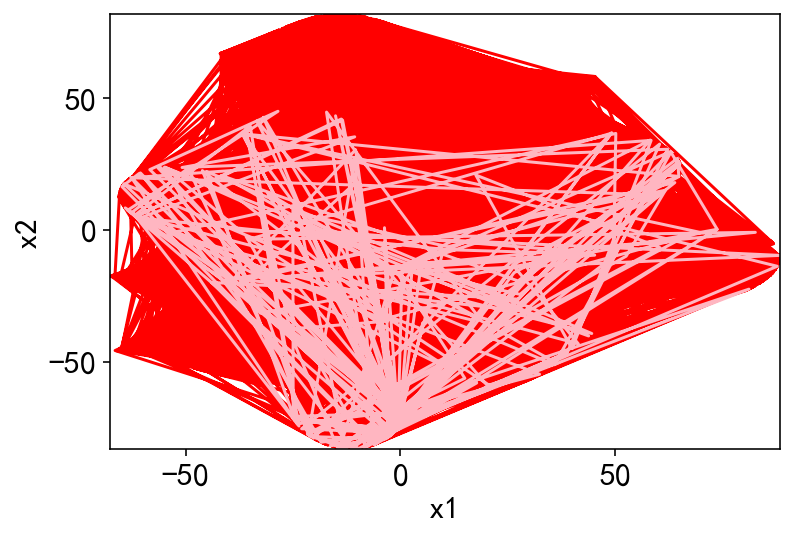

分类数量（含噪声-1，粉色）= 2   信噪比 = 20.27659574468085
eps = 0.95   min_sample = 3


In [130]:
DBS_Visualization(0.95,3,newweight)